In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pca import pca
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('clustering_elect.csv', index_col='user_id')

In [ ]:
df.head()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.48,76.48,76.480000
1515915625353230683,12.0,3.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.24,10.03,39.595000
1515915625353234047,35.0,1.0,0.0,0.0,35.0,0.0,0.0,19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.98,14.29,156.220286
1515915625353236157,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.49,52.49,52.490000
1515915625353294441,38.0,7.0,0.0,0.0,38.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1106.16,22.46,222.138158


Clustering을 위해 Standard Scaling 진행

In [ ]:
scale_df = StandardScaler().fit_transform(df)

In [ ]:
df_scaled = df.copy()

In [ ]:
for i in range(0, df.columns.size):
    df_scaled.iloc[:,i] = scale_df[:,i]

In [ ]:
df_scaled.head()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,-0.317044,-0.148511,-0.20593,-0.152518,-0.302770,-0.217077,-0.017137,-0.179435,-0.109423,-0.043972,...,-0.193037,-0.195211,-0.182636,-0.163982,-0.148481,-0.118888,-0.103584,-0.207052,-0.240367,-0.248761
1515915625353230683,3.723618,1.865938,-0.20593,-0.152518,4.294700,6.758762,-0.017137,-0.179435,-0.109423,-0.043972,...,-0.193037,-0.195211,-0.182636,-0.163982,-0.148481,-0.118888,-0.103584,-0.211241,-0.417280,-0.342058
1515915625353234047,12.172272,-0.148511,-0.20593,-0.152518,13.907592,-0.217077,-0.017137,32.383784,-0.109423,-0.043972,...,-0.193037,-0.195211,-0.182636,-0.163982,-0.148481,-0.118888,-0.103584,0.100592,-0.405938,-0.047065
1515915625353236157,-0.317044,-0.148511,-0.20593,-0.152518,-0.302770,-0.217077,-0.017137,-0.179435,3.103082,-0.043972,...,-0.193037,-0.195211,-0.182636,-0.163982,-0.148481,-0.118888,-0.103584,-0.251918,-0.304237,-0.309442
1515915625353294441,13.274271,5.894836,-0.20593,-0.152518,15.161448,0.364243,-0.017137,3.248273,3.103082,-0.043972,...,-0.193037,-0.195211,1.626384,-0.163982,-0.148481,-0.118888,-0.103584,1.718633,-0.384187,0.119669


In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_scaled)
label5 = kmeans.predict(df_scaled)
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_scaled)
label6 = kmeans.predict(df_scaled)
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_scaled)
label4 = kmeans.predict(df_scaled)
df_scaled['labels4'] = label4
df_scaled['labels5']= label5
df_scaled['labels6']= label6

In [ ]:
dfc = df.copy()
dfc['labels4'] = df_scaled['labels4']
df_group = dfc.groupby('labels4').agg('mean')
dfc.groupby('labels4')['user_id.1'].agg('count')

labels4
0      194
1    63046
2     3638
3        1
Name: user_id.1, dtype: int64

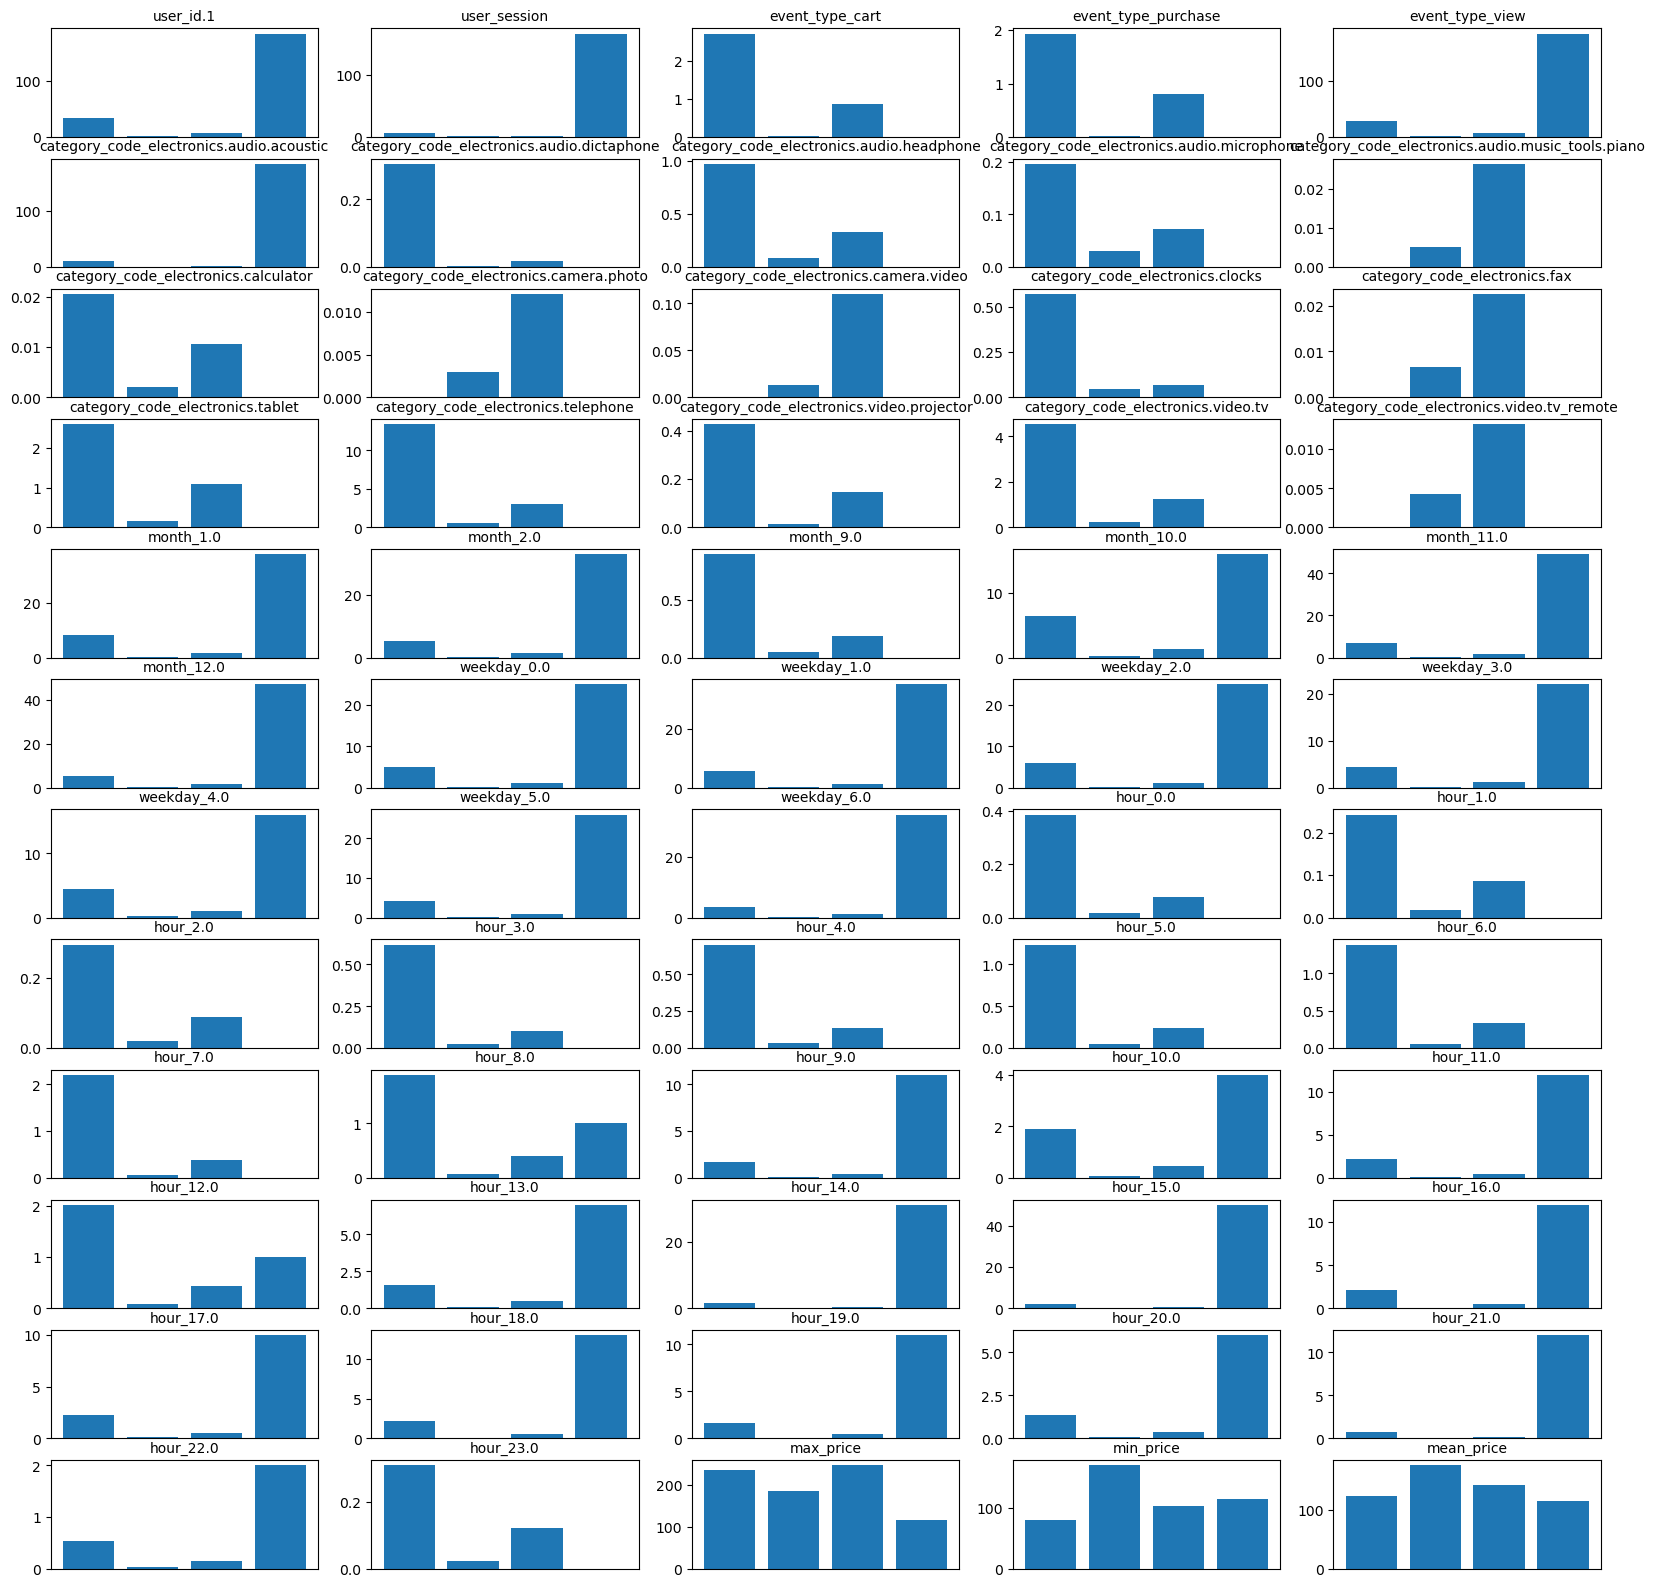

In [ ]:
plt.figure(figsize=(20,20))
for idx, col in enumerate(df_group.columns):
    plt.subplot(12,5,idx+1)
    plt.bar(df_group.index,df_group[col])
    plt.gca().axes.xaxis.set_visible(False)
    plt.title(col, fontsize=10)
plt.show()

In [ ]:
dfc = df.copy()
dfc['labels5'] = df_scaled['labels5']
df_group = dfc.groupby('labels5').agg('mean')
dfc.groupby('labels5')['user_id.1'].agg('count')

labels5
0     3560
1      183
2     4030
3    59087
4       19
Name: user_id.1, dtype: int64

In [ ]:
dfc.to_csv('cluster_5.csv')

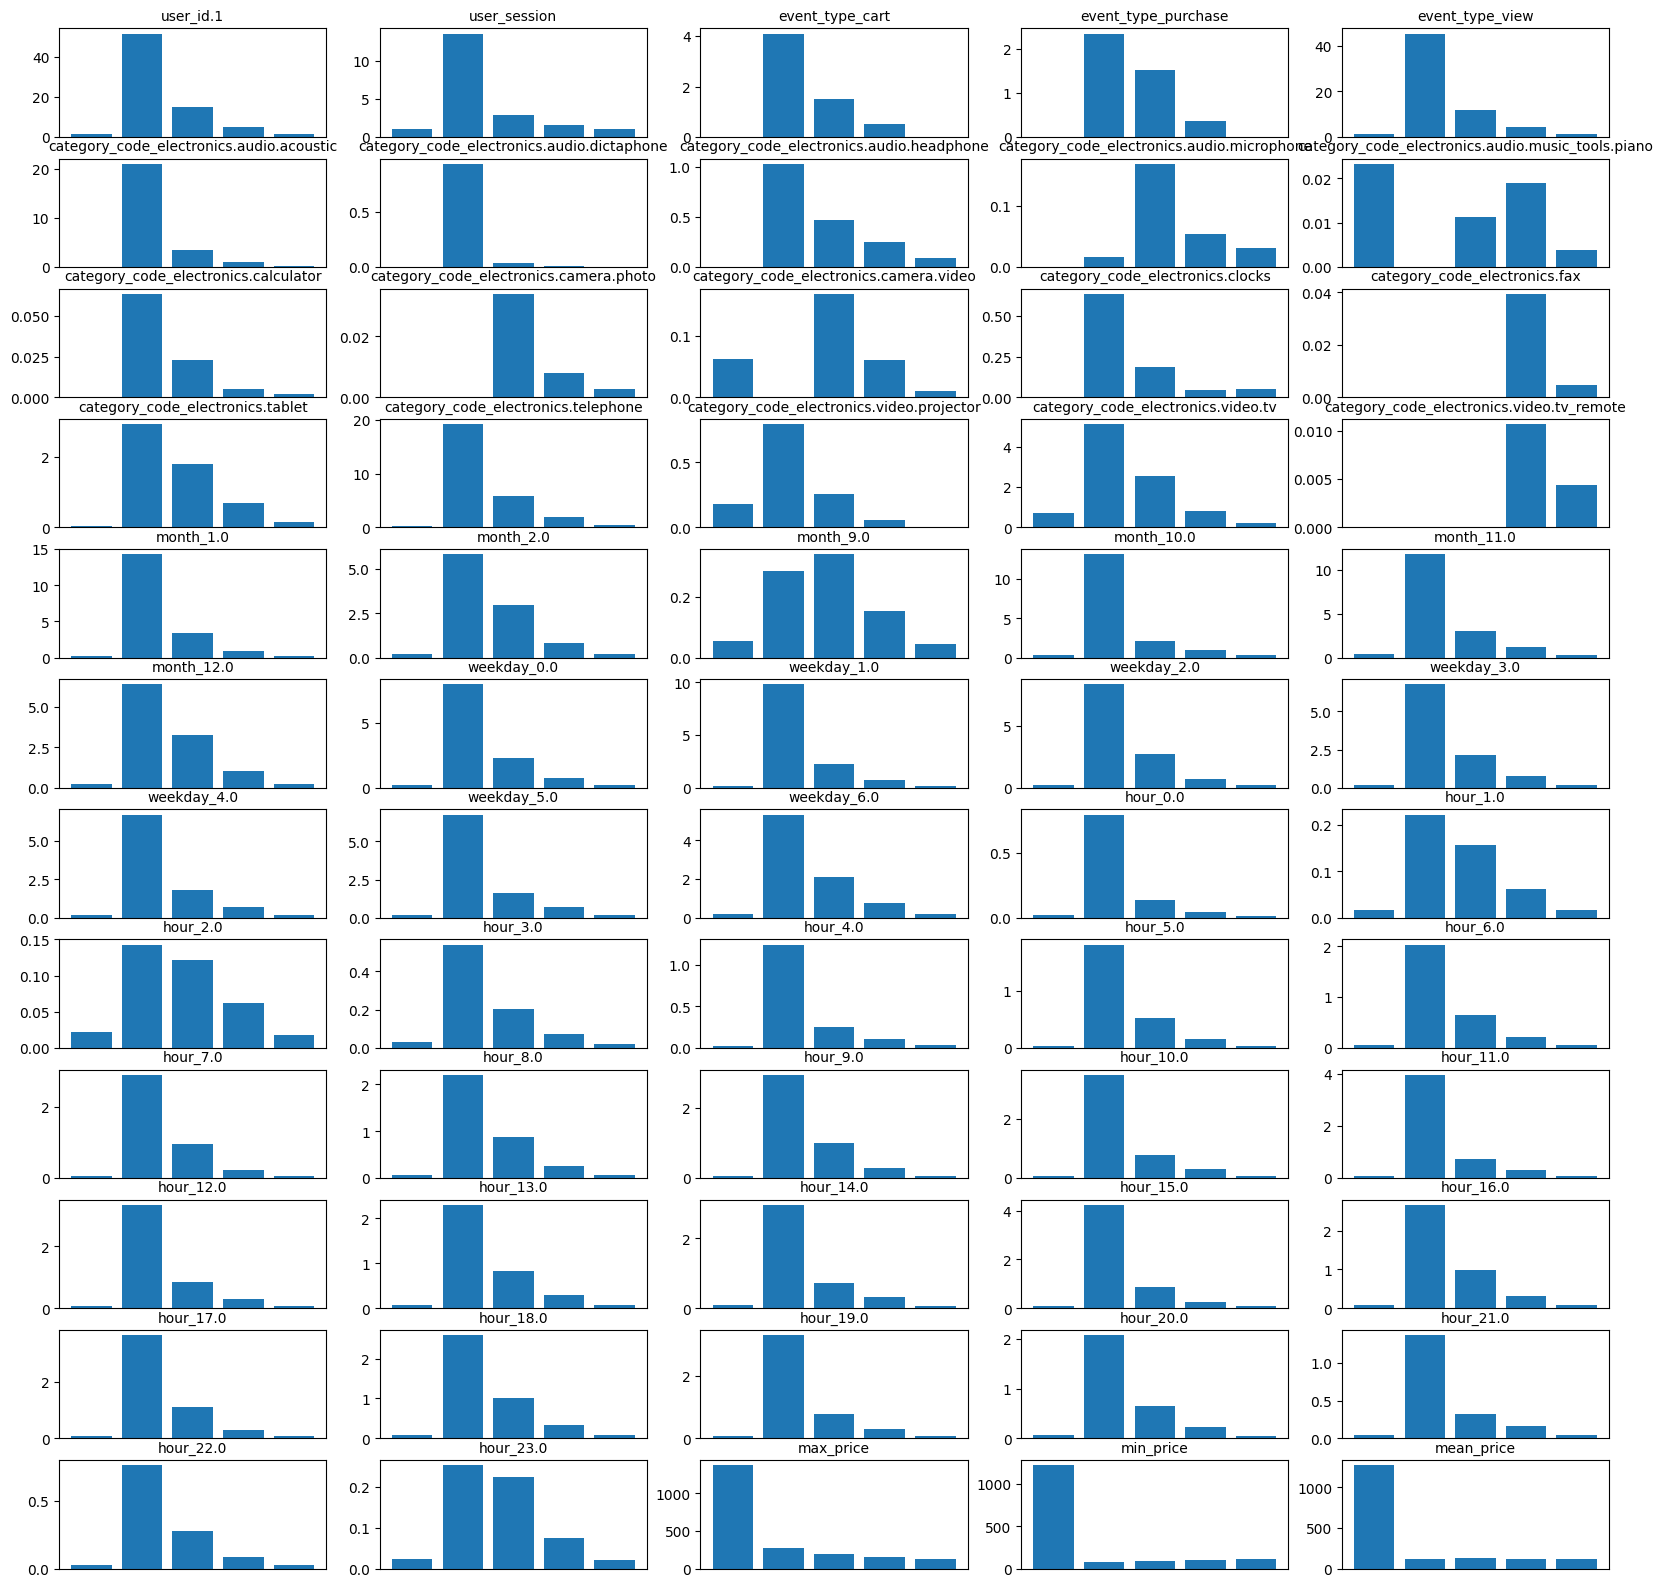

In [ ]:
plt.figure(figsize=(20,20))
for idx, col in enumerate(df_group.columns):
    plt.subplot(12,5,idx+1)
    plt.bar(df_group.index,df_group[col])
    plt.gca().axes.xaxis.set_visible(False)
    plt.title(col, fontsize=10)
plt.show()

In [ ]:
dfc = df.copy()
dfc['labels6'] = df_scaled['labels6']
df_group = dfc.groupby('labels6').agg('mean')
dfc.groupby('labels6')['user_id.1'].agg('count')

labels6
0    56641
1       59
2     6047
3       53
4     3227
5      852
Name: user_id.1, dtype: int64

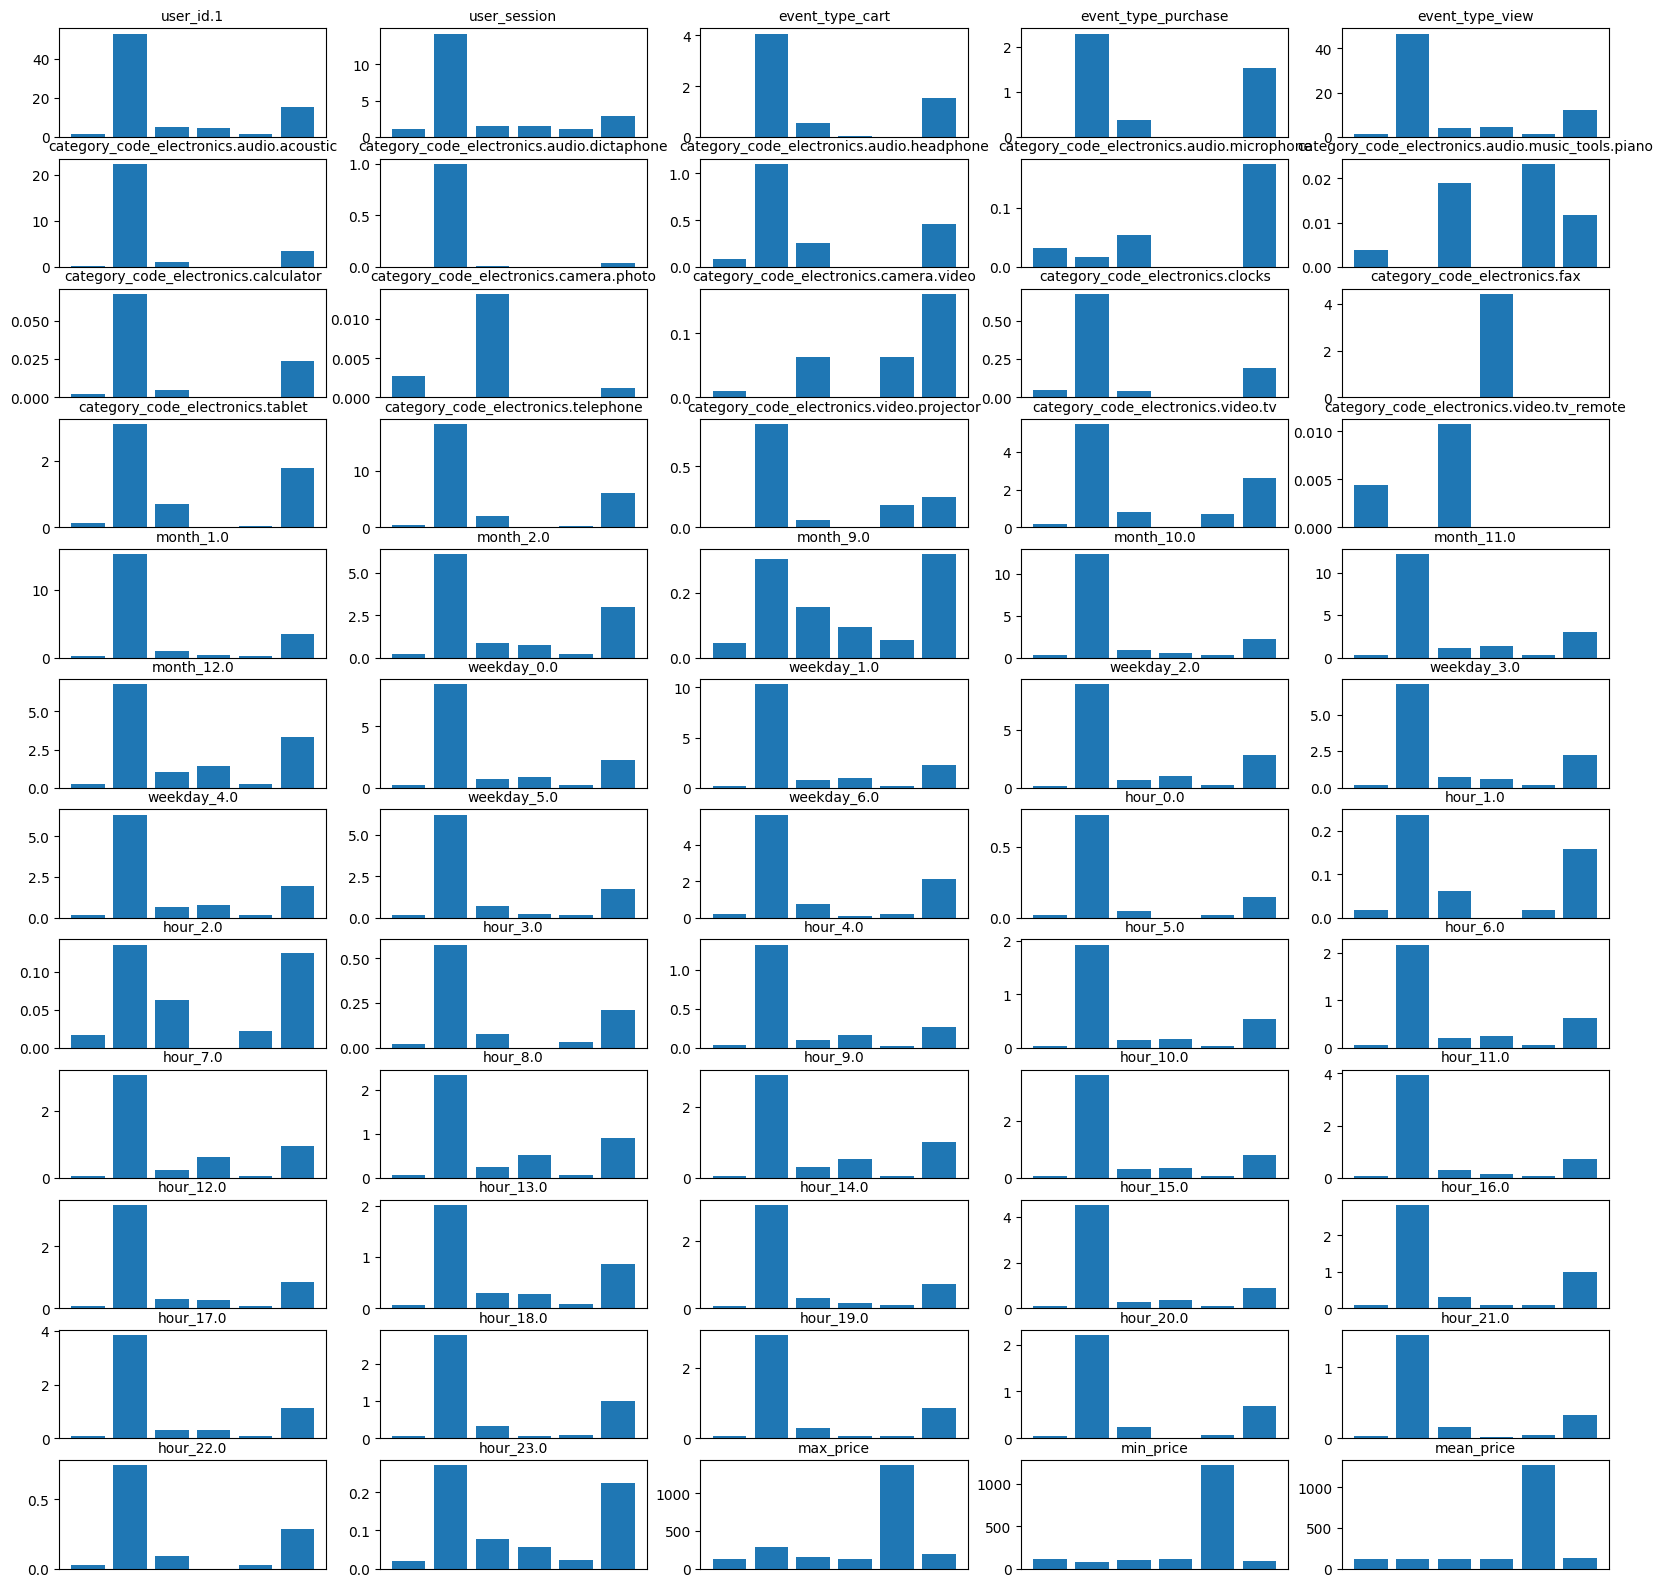

In [ ]:
plt.figure(figsize=(20,20))
for idx, col in enumerate(df_group.columns):
    plt.subplot(12,5,idx+1)
    plt.bar(df_group.index,df_group[col])
    plt.gca().axes.xaxis.set_visible(False)
    plt.title(col, fontsize=10)
plt.show()